<a href="https://colab.research.google.com/github/vinismachadoo/alura_imersao_dados_2/blob/main/microdados_enem_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1-eaylKyxVIdjqzW3RQuxiL63jYrR9j5b) 

#1. INTRODUÇÃO
Em 1998 era criado o Exame Nacional do Ensino Médio (Enem) com a finalidade de avaliar o desempenho dos estudantes de escolas públicas e particulares do Ensino Médio. Desde 2009, no entanto, o Enem assumiu mais uma função: ser a porta de entrada dos estudantes nas instituições federais de ensino superior, assim como para programas do Governo Federal como o Sisu, Prouni e Fies.

Milhões de estudantes em todo o país realizam o exame aplicado entre outubro e novembro em dois domingos consecutivos. No primeiro dia, são realizadas as provas de linguagens e códigos e de ciências humanas, além de uma redação. No segundo, o candidato testa seus conhecimentos em matemática e ciências da natureza. A prova, bastante temida entre os alunos, ocorre anualmente e requer quase um ano de preparação pra reunir todo o conteúdo do ensino médio.

Os microdados mais recentes do exame - a base de dados com todas as informações respondidas pelo candidato desde o momento da inscrição até o resultado - que estão disponíveis ao público no site do INEP são da edição realizada em 2019, que contou com mais de 5 milhões de inscrições de todo o país.

#2. BIBLIOTECAS E CONFIGURAÇÕES

In [ ]:
!pip install geopandas --quiet
!pip install squarify --quiet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.patches import Patch
from matplotlib.offsetbox import AnchoredText
import squarify
import geopandas as gpd
from tqdm import tqdm

import sys
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows=200
pd.options.display.max_columns=200

#3. BASE DE DADOS

O dataset que será explorado neste notebook pode ser encontrado [aqui](https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv). Para esta análise, o time da Alura selecionou uma amostra aleatória de 127,380 inscritos de forma a representar a população. É possível entender melhor a amostragem neste [link](https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/filtrarDados). Foram mantidas todas as 136 colunas do dataset original e a descrição de cada coluna, assim como suas categorias possíveis de resposta, neste [diconário](https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/DICION%C3%81RIO).

In [ ]:
enem = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

In [ ]:
enem.shape

(127380, 136)

In [ ]:
enem.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.273800e+05,127380.0,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,1.237570e+05,123757.000000,127380.000000,127380.000000,127380.000000,71978.000000,127380.000000,2.862700e+04,2.862700e+04,28627.000000,28627.000000,28627.000000,28627.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,127380.000000,127380.0,127380.0,127380.000000,127380.000000,127380.000000,127380.000000,127380.0,127380.000000,127380.000000,1.273800e+05,127380.000000,127380.000000,127380.000000,127380.000000,127380.000000,92758.000000,98043.000000,98043.000000,92758.000000,92758.000000,98043.000000,98043.000000,92758.000000,127380.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,98043.000000,127380.000000
mean,1.900035e+11,2019.0,3.086067e+06,30.709389,22.094355,1.076841,2.131198,1.029345,3.058310e+06,30.431103,1.540493,2.961870,1.330515,1.004585,0.120906,3.125412e+07,3.127669e+06,31.120690,2.257764,1.035037,1.005973,0.001099,0.000110,0.000259,0.000377,0.000008,0.001499,0.000479,0.001704,0.000353,0.000055,0.000228,0.000228,0.000659,0.000251,0.000746,0.000047,0.000008,0.001342,0.000039,0.000181,0.000801,0.001248,0.001515,0.001185,0.000188,0.002544,0.000110,0.000322,0.000275,0.000455,0.000008,0.0,0.000008,0.000008,0.000016,0.0,0.000008,0.000008,0.0,0.000118,0.000016,0.000008,0.0,0.0,0.000079,0.000031,0.000063,0.000008,0.0,0.000047,0.000079,3.088090e+06,30.730735,0.729016,0.771667,0.771667,0.729016,504.508538,508.511745,512.506910,516.509864,477.964015,507.365912,520.463928,523.555206,0.524486,1.136155,120.554859,122.912396,114.901013,121.682323,91.519435,571.570025,3.864068
std,1.469535e+06,0.0,9.961399e+05,9.931060,7.498707,0.440671,1.017373,0.202790,9.827584e+05,9.793934,0.716452,4.106733,0.555043,0.067556,0.326019,9.564098e+06,9.600084e+05,9.569764,0.755357,0.183876,0.122273,0.033134,0.010483,0.016094,0.019408,0.002802,0.038694,0.021878,0.041239,0.018792,0.007413,0.015087,0.015087,0.025671,0.015848,0.027299,0.006863,0.002802,0.036615,0

In [ ]:
# Colunas que tem algum valor nulo
enem.columns[enem.isnull().any()]

Index(['CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO',
       'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ENSINO', 'CO_ESCOLA',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],
      dtype='object')

#4. LISTAS E VARIÁVEIS AUXILIARES 

É bastante comum que ao longo da análise sejam necessárias listagens ordenadas para organizar os gráficos e aprimorar a visualização dos dados, além de variáveis (colunas) que são criadas a partir de outras variáveis e não existem na base de dados originais. Esta seção foi dedicada exclusivamente para esta finalidade, de forma a concentrar estas informações facilitando o desenvolvimento da análise e o entendimento do leitor.

In [ ]:
# Classes de renda, de A até Q, em ordem crescente
classes_renda = enem['Q006'].unique()
classes_renda.sort()

In [ ]:
# Colunas da base de dados que tem as notas das 5 provas realizadas
provas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC']

In [ ]:
# Colunas da base de dados que tem a indicação de alguma necessidade especial
atendimentos_especiais = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA','IN_AUTISMO', 'IN_VISAO_MONOCULAR']

In [ ]:
# Criação de nova coluna indicando se o candidato reside em um municipio e fez a prova em outro
enem.loc[enem['CO_MUNICIPIO_RESIDENCIA'] != enem['CO_MUNICIPIO_PROVA'], 'MUN_RES_E_MUN_PROVA'] = 'Diferente'
enem['MUN_RES_E_MUN_PROVA'].fillna('Igual', inplace=True)

In [ ]:
# Criação de nova coluna indicando se o candidato tem carro e/ou moto
enem.loc[enem['Q010'] == 'A', 'TEM_CARRO_OU_MOTO'] = 'Não'
enem.loc[enem['Q011'] == 'A', 'TEM_CARRO_OU_MOTO'] = 'Não'
enem['TEM_CARRO_OU_MOTO'].fillna('Sim', inplace=True)

In [ ]:
# Ajustando os 8 status possíveis da redação para zerada ou sem problemas
enem.loc[enem['TP_STATUS_REDACAO'] != 1, 'TP_STATUS_REDACAO'] = 'Zerada'
enem['TP_STATUS_REDACAO'].replace(1,'Sem problemas', inplace=True)

In [ ]:
# Ajeitando a coluna de treineiro com Não=0 e Sim=1
enem.loc[enem['IN_TREINEIRO'] == 1, 'IN_TREINEIRO'] = 'Sim'
enem['IN_TREINEIRO'].replace(0,'Não', inplace=True)

In [ ]:
# Ajeitando a coluna de posse de computador com tem ou não
enem.loc[enem['Q024'] != 'A', 'Q024'] = 'Sim'
enem['Q024'].replace('A','Não', inplace=True)

In [ ]:
# Ajeitando a coluna de conexão de internet com tem ou não
enem.loc[enem['Q025'] == 'A', 'Q025'] = 'Não'
enem['Q025'].replace('B','Sim', inplace=True)

In [ ]:
# Criação de nova coluna indicando se o candidato tem carro e/ou moto
enem.loc[enem['Q024'] == 'Não', 'TEM_COMPUTADOR_E_INTERNET'] = 'Não'
enem.loc[enem['Q025'] == 'Não', 'TEM_COMPUTADOR_E_INTERNET'] = 'Não'
enem['TEM_COMPUTADOR_E_INTERNET'].fillna('Sim', inplace=True)

In [ ]:
# Criação de nova coluna indicando o somatório de pontos do candidato
enem["NU_NOTA_SOMA"] = enem[provas].sum(axis=1)

#5. ESTATÍSTICAS SOCIODEMOGRÁFICAS 

Dados sociodemográficos possibilitam obter uma visão mais profunda sobre o publico e criar hipóteses mais coerentes com a realidade. Dentre estas informações estão sexo, idade, local de residência, etnia, renda etc.

Dito isso, nossa primeira descoberta é a participação de mulheres e homens no exame. Segundo o IBGE, no [Censo de 2010](https://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-sexo.html), a população brasileira era igualmente equilibrada, com mulheres representando pouco mais de 50%. Contudo, observa-se uma maior participação considerável (59%) de mulheres no exame, o que pode refletir uma maior participação de mulheres no sistema educacional brasileiro. Ainda segundo o [IBGE](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/20234-mulher-estuda-mais-trabalha-mais-e-ganha-menos-do-que-o-homem#:~:text=Mulher%20estuda%20mais%2C%20trabalha%20mais%20e%20ganha%20menos%20do%20que%20o%20homem,-Editoria%3A%20Estat%C3%ADsticas%20Sociais&text=Mesmo%20assim%2C%20e%20ainda%20contando,G%C3%AAnero%2C%20divulgado%20hoje%20pelo%20IBGE.), "em 2016, as mulheres de 15 a 17 anos de idade tinham frequência escolar líquida (proporção de pessoas que frequentam escola no nível de ensino adequado a sua faixa etária) de 73,5% para o ensino médio, contra 63,2% dos homens. *Isso significa que 36,8% dos homens estavam em situação de atraso escolar*"



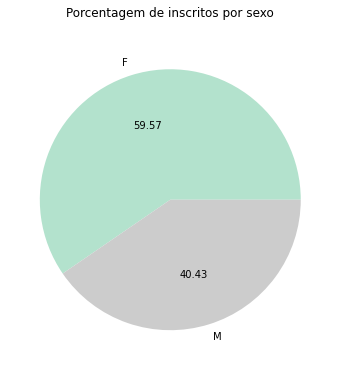

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
enem['TP_SEXO'].value_counts().plot(kind='pie', ax=ax, cmap='Pastel2', autopct='%.2f')
plt.title('Porcentagem de inscritos por sexo', pad=20, fontsize=12, color='black')
sns.despine()
plt.ylabel('')
plt.show()

Continuamos a analisar a amostra segundo a idade do candidato. Desde 2017, o exame perdeu a validez como diploma de ensimo médio [(até 2016 poderia era possível tirar um certificado de ensino médio por meio do Enem)](https://www.educamaisbrasil.com.br/educacao/enem/como-pegar-o-certificado-do-ensino-medio-pelo-enem) e tem função única e exclusivamente para o ingresso no ensino superior.

Com isso, o candidato só pode realizar o exame à vera estando no último ano do ensino médio ou já tendo o completado. Existe uma categoria que indica se o aluno fez a prova como treino ou pra valer. Assim queremos entender como é o público do exame em termos de idade, quem são os treineiros e se existe alguma diferença na distribuição das idades por sexo.

In [ ]:
enem['NU_IDADE'].min(), enem['NU_IDADE'].max()

(13, 82)

É legal ver que temos desde pessoas com 13 anos até 82 anos prestando o exame. Este histograma é bem condizente com a realidade haja vista o objetivo do exame e uma maior importância para os jovens em torno de 17 e 22 anos galgando uma oportunidade no ensino superior. Como era de se esperar, os treinieros se concentram em torno dos 17 anos e os histogramas de mulheres e homens parecem ter a mesma distribuição.

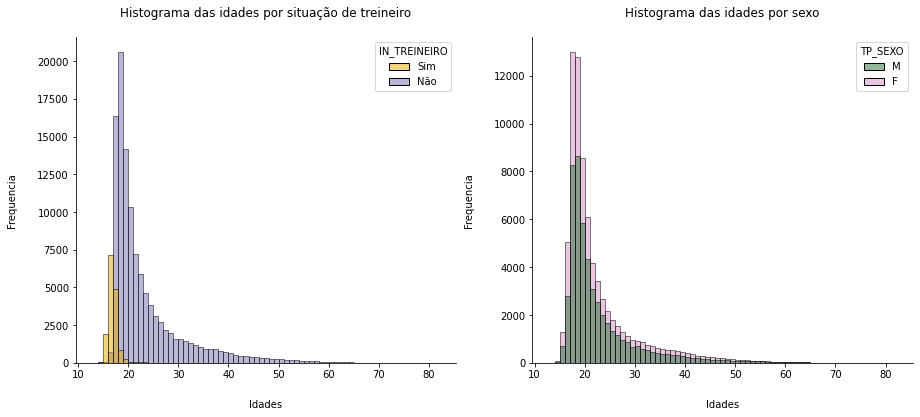

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data=enem, x='NU_IDADE', hue='IN_TREINEIRO', bins=69, ax=ax1, palette='Dark2_r')
sns.histplot(data=enem, x='NU_IDADE', hue='TP_SEXO', bins=69, ax=ax2, palette='cubehelix')
sns.despine()
ax1.set_title('Histograma das idades por situação de treineiro', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Idades', labelpad=20)
ax1.set_ylabel('Frequencia', labelpad=20)
ax2.set_title('Histograma das idades por sexo', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Idades', labelpad=20)
ax2.set_ylabel('Frequencia', labelpad=20)

plt.show()



Uma análise importante de se avaliar, também, é a distribuição dos inscritos pelos estados do Brasil. É importante entender se os estados mais populosos são também os com mais inscritos, por exemplo. Segundo o IBGE, em divulgação no [Diário Oficial da União](https://www.in.gov.br/web/dou/-/portaria-n-pr-254-de-25-de-agosto-de-2020-274382852) os estados mais populosos são: São Paulo (46,289,333), Minas Gerais (21,292,666) e Rio de Janeiro (17,366,189). Portanto a amostra está coerente haja vista que os estados de São Paulo e Minas Gerais apresentam as maiores quantidades de estudantes inscritos.

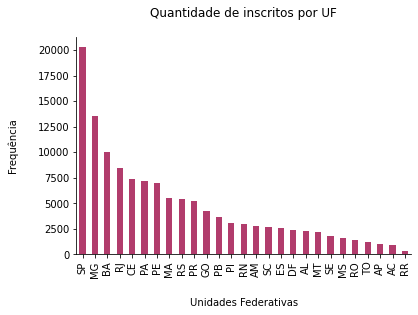

In [ ]:
fig, ax = plt.subplots()
enem['SG_UF_RESIDENCIA'].value_counts().plot(kind='bar', color=sns.color_palette('flare')[3])
plt.title('Quantidade de inscritos por UF', pad=20, fontsize=12, color='black')
plt.xlabel('Unidades Federativas', labelpad=20)
plt.ylabel('Frequência', labelpad=20)
sns.despine()
plt.show()

Este gráfico de barras, no entando, fica muito ruim para entender a relação entre os estados, por exemplo estados vizinhos com quantidade de inscritos bastante diferentes. Uma alternativa seria colorir as barras segundo as regiões do IBGE, mas preferiu-se plotar um mapa pois fica mais intuitiva a comparação. Podemos observar logo de cara que São Paulo, Minas Gerais e Bahia são os estados líderes na quantidade de inscrições. Podemos ver também facilmente que Santa Catarina, na região Sul do país teve bem menos inscritos que seus estados vizinhos.

In [ ]:
mapa_brasil = gpd.read_file('https://raw.githubusercontent.com/vinismachadoo/alura_imersao_dados_2/main/uf_brasil.geojson')

In [ ]:
mapa_brasil['codigo_ibg'] = mapa_brasil['codigo_ibg'].astype('int')

In [ ]:
inscritos_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem['CO_UF_RESIDENCIA'].value_counts()], axis=1)

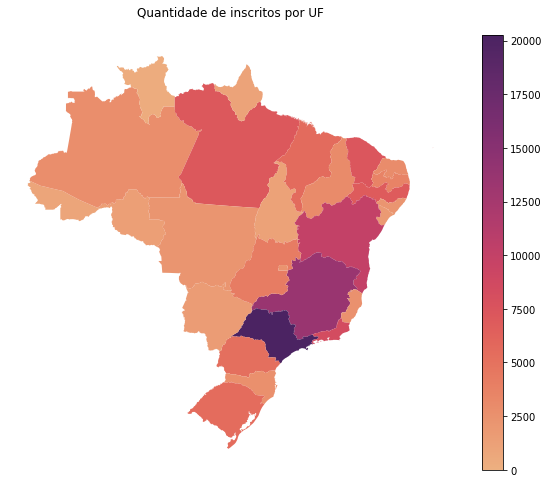

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
inscritos_por_estado.plot(ax=ax, column='CO_UF_RESIDENCIA', cmap='flare', legend=True, vmin=0)
sns.despine(bottom=True, left=True)
plt.title('Quantidade de inscritos por UF', pad=20, fontsize=12, color='black')
ax.set_yticks([])
ax.set_xticks([])
plt.show()

Nossa última análise engloba etnia e renda. Com 300 anos de escravidão no Brasil, é um senso comum que ainda hoje as classes mais pobres tem predominância parda e negra enquanto as classes altas são dominadas por brancos. Consequência disso, foi a necessidade de criação de um sistema de cotas como forma de reparação histórica para esse povo que ainda nos dias de hoje não tem as mesmas oportunidades que seus opressores. O que queremos então, é averiguar se este senso comum da nossa sociedade também se reflete nos inscritos do Enem.

In [ ]:
relacao_renda_raca = enem.groupby('Q006')['TP_COR_RACA'].value_counts(normalize=True).unstack()
relacao_renda_raca.rename(columns={0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena'}, inplace=True)

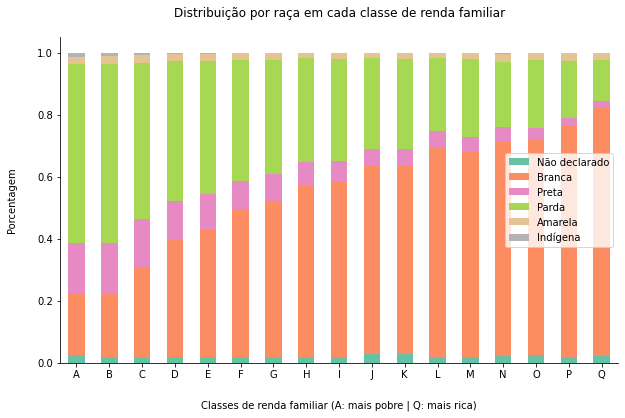

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
relacao_renda_raca.plot(kind='bar', stacked=True, colormap='Set2', ax=ax)
plt.title('Distribuição por raça em cada classe de renda familiar', pad=20, fontsize=12, color='black')
plt.xlabel('Classes de renda familiar (A: mais pobre | Q: mais rica)', labelpad=20)
plt.xticks(label=classes_renda, rotation=0)
plt.ylabel('Porcentagem', labelpad=20)
sns.despine()
plt.legend()
plt.show()

Fica claro pelo gráfico como essas estatísticas são completamente dependentes e correlacionadas haja vista que os estudantes com diferentes cores de pele não estão distribuídos igualmente entre as classes econômicas: nas classes econômicas mais baixas predominam os estudantes pretos e pardos, e conforme a renda familiar aumenta percebe-se um embranquecimento da cor da pele. Portanto, a partir daqui, as análises feitas por renda podem também ser entendidas análogamente como análises por raça.

#6. INSCRITOS FALTOSOS

Como explicado na introdução, o exame é realizado em 2 domingos consecutivos e, portanto, o estudante tem 2 chances de encontrar o portão fechado. A primeira análise realizada partiu da hipótese que se o candidato perde a prova no primeiro dia ele não comparece ao segundo dia. 

Esta hipótese foi confirmada constatando que 99.27% dos candidatos ausentes no primeiro dia não apareceram no domingo seguinte. Esta constatação é condizente com o esperado haja vista que o candidato que zera alguma prova não está apto a se cadastrar no sisu para tentar vaga em alguma universidade pública ou algum programa do governo federal.

Dito isso, considerou-se como candidato faltoso, aquele que não compareceu há pelo menos um domingo. Complementariamente, considerou-se como candidato presente aquele que compareceu aos dois dias do exame.

In [ ]:
enem.groupby('TP_PRESENCA_CH')['TP_PRESENCA_MT'].value_counts(normalize=True).unstack().rename(columns={0:'Falta',1:'Presente',2:'Eliminado'},
                                                                                               index={0:'Falta',1:'Presente',2:'Eliminado'})

TP_PRESENCA_MT,Falta,Presente,Eliminado
TP_PRESENCA_CH,,,
Falta,0.992708,0.007292,NaN
Presente,0.055608,0.943861,0.00053
Eliminado,0.952381,0.047619,NaN


A segunda hipótese levantada foi se existia alguma relação do não comparecimento do inscrito com o local de aplicação da prova. Acontece que o estudante pode ser alocado para um município (ou até mesmo estado) diferente do qual reside por falta de escolas com estrutura de aplicação. Outro fator que piora o cenário é a posse de carro ou moto na residência visto depender do transporte público no Brasil em circunstâncias normais já é desgastante para o candidato, tendo que ir para outra cidade pode sim ser um fator para desistência de prestar o exame.

In [ ]:
# Inscritos que não estavam presentes na prova de ciencias humanas (dia 1) ou na prova de matemática (dia 2)
enem_faltosos = enem[(enem['TP_PRESENCA_CH'] == 0) | (enem['TP_PRESENCA_MT'] == 0)]

In [ ]:
enem_faltosos.groupby('MUN_RES_E_MUN_PROVA')['TEM_CARRO_OU_MOTO'].value_counts()

MUN_RES_E_MUN_PROVA  TEM_CARRO_OU_MOTO
Diferente            Não                   5497
                     Sim                    636
Igual                Não                  26278
                     Sim                   2372
Name: TEM_CARRO_OU_MOTO, dtype: int64

In [ ]:
# Quantidade por local de prova diferente de onde reside e posse de carro ou moto
tmp = enem_faltosos.groupby('MUN_RES_E_MUN_PROVA')['TEM_CARRO_OU_MOTO'].value_counts()
relacao_municipio_prova_veiculo = [f'{round(tmp[i]*100/tmp.sum(),2)}%' for i in tmp.index]
relacao_municipio_prova_veiculo

['15.8%', '1.83%', '75.55%', '6.82%']

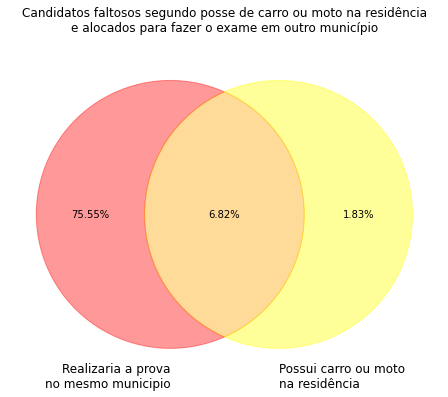

In [ ]:
# Diagrama de Venn para visualizar a relacao acima 
fig, ax = plt.subplots(figsize=(10,6))

v = venn2(subsets = (2,2,2), set_labels = ('Realizaria a prova\nno mesmo municipio', 'Possui carro ou moto\nna residência'), ax=ax)
v.get_patch_by_id('10').set_color('red')
v.get_patch_by_id('01').set_color('yellow')
v.get_patch_by_id('11').set_color('orange')
v.get_label_by_id('10').set_text(relacao_municipio_prova_veiculo[2])
v.get_label_by_id('01').set_text(relacao_municipio_prova_veiculo[1])
v.get_label_by_id('11').set_text(relacao_municipio_prova_veiculo[3])

plt.title('Candidatos faltosos segundo posse de carro ou moto na residência\ne alocados para fazer o exame em outro município', 
          pad=20, fontsize=12, color='black')
plt.show()

O que foi observado é que mais 90% dos candidatos que faltaram pelo menos um dos dias não tinham carro ou moto para se transportar, sendo 15% deles alocados para um outro município daquele em que reside. Apenas 7% dos inscritos faltaram o exame tendo carro ou moto na residência e realizariam o exame no mesmo município de residência.

Vale ressaltar que não é possível saber o motivo concreto da ausência do inscrito, pretende-se apenas mostrar que este fatores combinados podem ter sido decisivos na presença (ou não) ao local da prova.

#7. AS NOTAS DO ENEM

Uma das primeiras notícias a sair no jornal no dia da divulgação das notas, antes mesmo de muitos candidatos conseguirem acessar o site do INEP, é o quantitativo de redações zeradas, o que muitas vezes deixa o candidato ainda mais nervoso. No exame em questão, foram 2,562 redações zeradas por quaisquer um dos motivos possíveis de nota zero: anulação, cópia do texto motivador, texto em branco, fuga ao tema, inconsistência do tipo textual, texto insuficiente ou parte desconectada. 

In [ ]:
# Inscritos que estavam presentes na prova de ciencias humanas (dia 1) e na prova de matemática (dia 2)
enem_presentes = enem[(enem['TP_PRESENCA_CH'] == 1) & (enem['TP_PRESENCA_MT'] == 1)]

In [ ]:
# Quantidade por status da redação
enem_presentes['TP_STATUS_REDACAO'].value_counts()

Sem problemas    89977
Zerada            2562
Name: TP_STATUS_REDACAO, dtype: int64

In [ ]:
redacao_zerada_por_renda = pd.concat([enem_presentes[enem_presentes['TP_STATUS_REDACAO'] == 'Zerada']['Q006'].value_counts().rename('Zeradas'),
                                      enem_presentes['Q006'].value_counts().rename('Total')], axis=1)

In [ ]:
redacao_zerada_por_renda['Porcentagem'] = redacao_zerada_por_renda['Zeradas']/redacao_zerada_por_renda['Total']

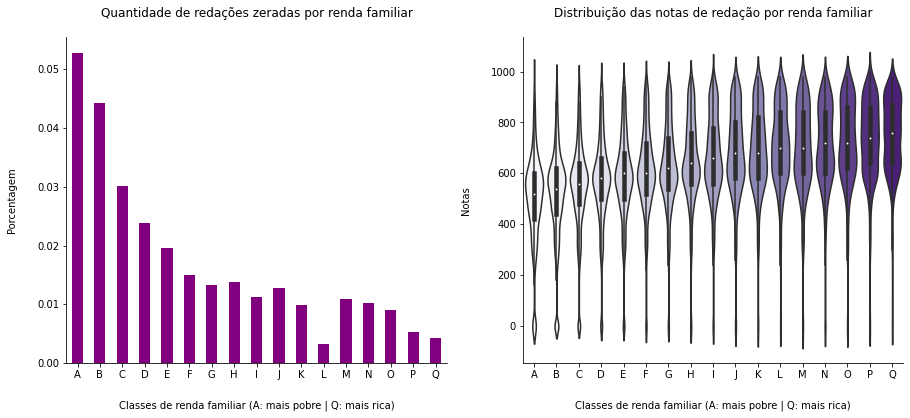

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
redacao_zerada_por_renda['Porcentagem'].sort_index().plot(kind='bar', color='purple', ax=ax1)
ax1.set_title('Quantidade de redações zeradas por renda familiar', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Classes de renda familiar (A: mais pobre | Q: mais rica)', labelpad=20)
ax1.set_xticklabels(classes_renda, rotation=0)
ax1.set_ylabel('Porcentagem', labelpad=20)

sns.violinplot(data=enem_presentes, x='Q006', y='NU_NOTA_REDACAO', order=classes_renda, scale='width', palette="Purples", ax=ax2)
ax2.set_title('Distribuição das notas de redação por renda familiar', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Classes de renda familiar (A: mais pobre | Q: mais rica)', labelpad=20)
ax2.set_ylabel('Notas', labelpad=20)

sns.despine()
plt.show()

A hipótese lavantada é de que, sendo a redação uma receita de bolo, alunos mais ricos tem menos chance de zerar a redação e mais chances de tirar notas melhores por serem mais treinados e terem mais dicas de como conquistar a nota máxima. É possível notar pelos gráficos que a maioria das redações nota 0 encontram-se nas classes inferiores e que a distribuição das notas se concentra em patamares superiores conforme a renda familiar aumenta, favorecendo a hipótese de que a redação segue um tutorial e o candidato pode se preparar através de "treinos particulares" (famosos cursinhos pré vestibular). 

Além disso, costuma ser divulgado a quantidade de redações perfeitas, isto é, nota máximo (1000). Os louros foram apenas para duas estudantes dos estados de Ceará e Alagoas.

In [ ]:
# Subset de inscritos que tiraram nota 1000 an redação
enem_presentes[enem_presentes['NU_NOTA_REDACAO'] == 1000]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,MUN_RES_E_MUN_PROVA,TEM_CARRO_OU_MOTO,TEM_COMPUTADOR_E_INTERNET,NU_NOTA_SOMA
22973,190001922151,2019,2304400,Fortaleza,23,CE,17,F,1,3,1,2304400.0,Fortaleza,23.0,CE,2,0,3,1.0,Não,23564121.0,2304400.0,Fortaleza,23.0,CE,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,1,1,1,1,506.0,507.0,511.0,517.0,623.6,665.7,616.7,793.1,DEADBDAEEBCDCEACBCBBECCDBEBACEDEADABBCBECECCB,EEBCCBDBBAACBCEEEBCDCACDEDBCCDBBEEDEADBEEACDB,BDACE99999BCBAADDDBDDAAECDBECEECBCCDEEDBADEBBC...,AACDCBEEEBEDDDEBADAACDBBCECEBCBADBECBDECEDDDA,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,Sem problemas,200.0,200.0,200.0,200.0,200.0,1000.0,G,G,E,D,4,P,D,E,E,C,A,B,B,B,B,B,A,A,E,B,B,E,B,Sim,Sim,Igual,Não,Sim,3699.1
61045,190003443879,2019,2702900,Girau do Ponciano,27,AL,20,F,1,3,1,2700300.0,Arapiraca,27.0,AL,1,3,1,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2702900,Girau do Ponciano,27,AL,1,1,1,1,503.0,509.0,514.0,515.0,660.3,667.9,617.4,733.5,CEECCDDEADCCCDDBBCECADAEAAACACBDEBCCEDCEDDADE,ACACEEBCCBABADBEEACDBBAEBCCABCDBADCADDDBBDECE,99999AACEABACCCDBDEBDACDDDECCECDDBAEBCDAAECBCC...,EAEADDEBBBCCCDBABEDEACCBBDCEAEDBECBEDECEDAEAA,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,Sem problemas,200.0,200.0,200.0,200.0,200.0,1000.0,E,G,F,D,5,I,A,B,D,B,A,B,A,A,A,A,A,A,B,A,A,D,A,Sim,Sim,Igual,Não,Sim,3679.1


In [ ]:
notas = enem_presentes[provas]
notas.describe()

,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC
count,92539.000000,92539.000000,92539.000000,92539.000000
mean,478.026814,523.681280,510.063370,522.298789
std,76.247734,109.346899,81.441879,63.132783
min,0.000000,0.000000,0.000000,0.000000
25%,418.000000,435.400000,450.800000,485.500000
50%,470.300000,501.800000,513.600000,527.600000
75%,533.300000,598.400000,569.100000,566.500000
max,797.300000,985.000000,809.400000,801.700000


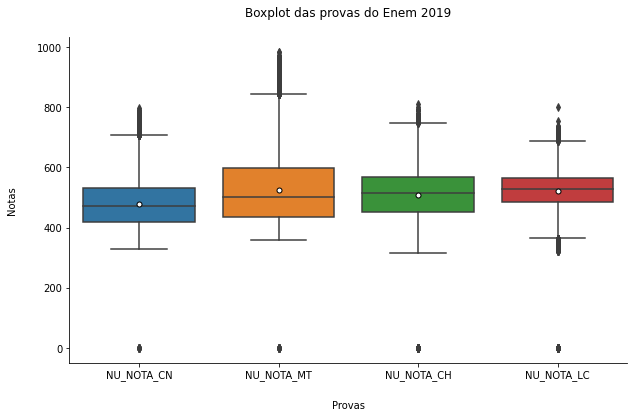

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=notas.drop(columns=['NU_NOTA_REDACAO']), palette="tab10", showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", 
                                                                    "markeredgecolor":"black", "markersize":"5"})
plt.title('Boxplot das provas do Enem 2019', pad=20, fontsize=12, color='black')
plt.xlabel('Provas', labelpad=20)
plt.ylabel('Notas', labelpad=20)
sns.despine()
plt.show()

In [ ]:
for c in notas.columns:
  print(f'A nota mínima diferente de zero em {c} é {notas[notas[c] > 0][c].min()}')

A nota mínima diferente de zero em NU_NOTA_CN é 327.9
A nota mínima diferente de zero em NU_NOTA_MT é 359.0
A nota mínima diferente de zero em NU_NOTA_CH é 315.9
A nota mínima diferente de zero em NU_NOTA_LC é 322.2


Podemos tirar algumas conclusões deste boxplot:
* A nota mínima das provas fica acima dos 300 pontos. A única forma de tirar menos do que isso é zerando a prova;
* As notas de ciências da natureza tem a menor média e a menor mediana - nota que divide a amostra pela metade - indicando ser a área do conhecimento onde os candidatos tem maior dificuldade;
* A nota de matemática é a que tem o maior intervalo entre mínimo e máximo, indicando possivelmente ser a prova onde os candidatos tem a maior chance de se destacarem dos demais;
* A nota de linguagens e códigos tem o menor intervalo interquartil, isto é, 50% das notas dos candidatos estão comprimidas dentro deste intervalo (caixa vermelha), indicando possivelmente (ao contrário da nota de matemática) que é a prova a qual os candidatos são menos destacáveis do todo.

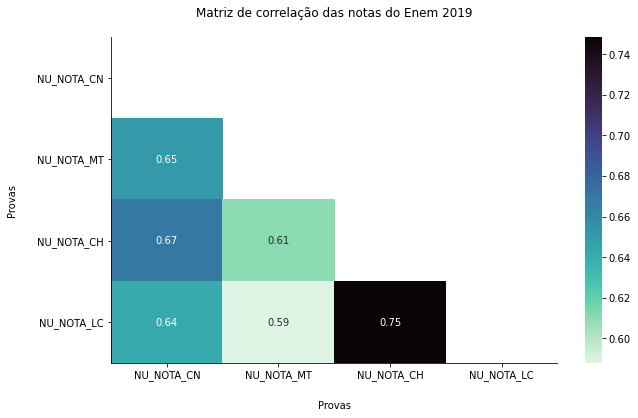

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
mask = np.triu(np.ones_like(notas.corr(), dtype=bool))
sns.heatmap(notas.corr(), cmap="mako_r", annot=True, mask=mask)

plt.title('Matriz de correlação das notas do Enem 2019', pad=20, fontsize=12, color='black')
plt.xlabel('Provas', labelpad=20)
plt.ylabel('Provas', labelpad=20)
plt.yticks(rotation=0)
sns.despine()
plt.show()

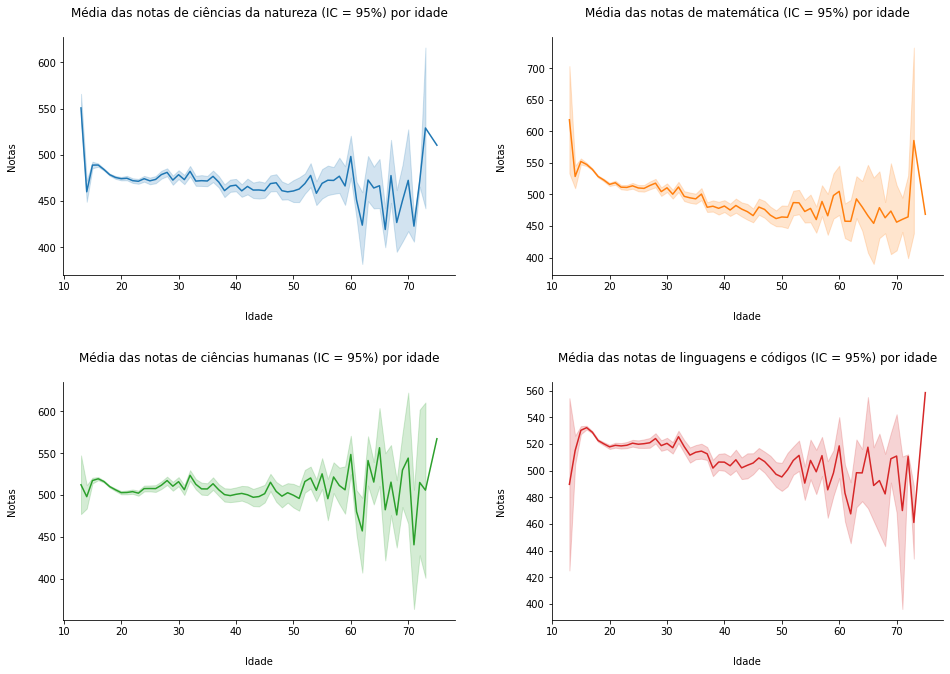

In [ ]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,10))

sns.lineplot(ax=ax1, data=enem_presentes, x='NU_IDADE', y='NU_NOTA_CN', markers=True,dashes=False, color=sns.color_palette("tab10")[0])
sns.lineplot(ax=ax2, data=enem_presentes, x='NU_IDADE', y='NU_NOTA_MT', markers=True,dashes=False, color=sns.color_palette("tab10")[1])
sns.lineplot(ax=ax3, data=enem_presentes, x='NU_IDADE', y='NU_NOTA_CH', markers=True,dashes=False, color=sns.color_palette("tab10")[2])
sns.lineplot(ax=ax4, data=enem_presentes, x='NU_IDADE', y='NU_NOTA_LC', markers=True,dashes=False, color=sns.color_palette("tab10")[3])

ax1.set_title('Média das notas de ciências da natureza (IC = 95%) por idade', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Idade', labelpad=20)
ax1.set_ylabel('Notas', labelpad=20)
ax2.set_title('Média das notas de matemática (IC = 95%) por idade', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Idade', labelpad=20)
ax2.set_ylabel('Notas', labelpad=20)
ax3.set_title('Média das notas de ciências humanas (IC = 95%) por idade', pad=20, fontsize=12, color='black')
ax3.set_xlabel('Idade', labelpad=20)
ax3.set_ylabel('Notas', labelpad=20)
ax4.set_title('Média das notas de linguagens e códigos (IC = 95%) por idade', pad=20, fontsize=12, color='black')
ax4.set_xlabel('Idade', labelpad=20)
ax4.set_ylabel('Notas', labelpad=20)

sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
media_por_escolaridade_pai = enem_presentes.groupby('Q001')[provas].mean()
media_por_escolaridade_pai.sort_index(ascending=False, inplace=True)

In [ ]:
media_por_escolaridade_mae = enem_presentes.groupby('Q002')[provas].mean()
media_por_escolaridade_mae.sort_index(ascending=False, inplace=True)

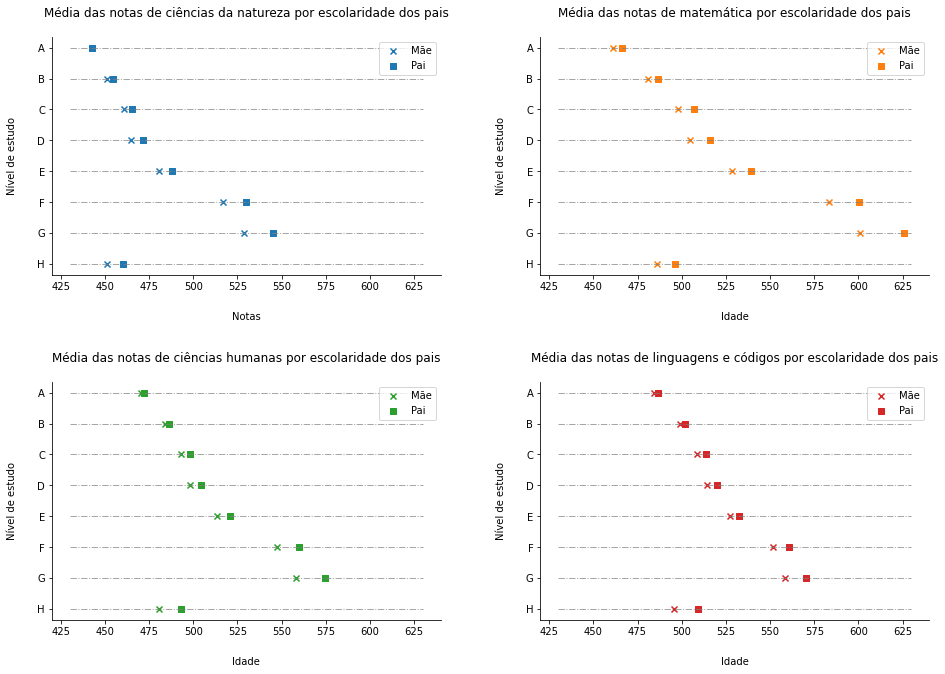

In [ ]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,10))
ax1.hlines(y=media_por_escolarida_mae.index, xmin=430, xmax=630, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax1.scatter(y=media_por_escolaridade_mae.index, x=media_por_escolaridade_mae['NU_NOTA_CN'], marker='x', color=sns.color_palette("tab10")[0], label='Mãe')
ax1.scatter(y=media_por_escolaridade_pai.index, x=media_por_escolaridade_pai['NU_NOTA_CN'], marker='s', color=sns.color_palette("tab10")[0], label='Pai')
ax2.hlines(y=media_por_escolaridade_mae.index, xmin=430, xmax=630, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax2.scatter(y=media_por_escolaridade_mae.index, x=media_por_escolaridade_mae['NU_NOTA_MT'], marker='x', color=sns.color_palette("tab10")[1], label='Mãe')
ax2.scatter(y=media_por_escolaridade_pai.index, x=media_por_escolaridade_pai['NU_NOTA_MT'], marker='s', color=sns.color_palette("tab10")[1], label='Pai')
ax3.hlines(y=media_por_escolaridade_mae.index, xmin=430, xmax=630, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax3.scatter(y=media_por_escolaridade_mae.index, x=media_por_escolaridade_mae['NU_NOTA_CH'], marker='x', color=sns.color_palette("tab10")[2], label='Mãe')
ax3.scatter(y=media_por_escolaridade_pai.index, x=media_por_escolaridade_pai['NU_NOTA_CH'], marker='s', color=sns.color_palette("tab10")[2], label='Pai')
ax4.hlines(y=media_por_escolaridade_mae.index, xmin=430, xmax=630, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax4.scatter(y=media_por_escolaridade_mae.index, x=media_por_escolaridade_mae['NU_NOTA_LC'], marker='x', color=sns.color_palette("tab10")[3], label='Mãe')
ax4.scatter(y=media_por_escolaridade_pai.index, x=media_por_escolaridade_pai['NU_NOTA_LC'], marker='s', color=sns.color_palette("tab10")[3], label='Pai')

ax1.set_title('Média das notas de ciências da natureza por escolaridade dos pais', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Notas', labelpad=20)
ax1.set_ylabel('Nível de estudo', labelpad=20)
ax2.set_title('Média das notas de matemática por escolaridade dos pais', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Idade', labelpad=20)
ax2.set_ylabel('Nível de estudo', labelpad=20)
ax3.set_title('Média das notas de ciências humanas por escolaridade dos pais', pad=20, fontsize=12, color='black')
ax3.set_xlabel('Idade', labelpad=20)
ax3.set_ylabel('Nível de estudo', labelpad=20)
ax4.set_title('Média das notas de linguagens e códigos por escolaridade dos pais', pad=20, fontsize=12, color='black')
ax4.set_xlabel('Idade', labelpad=20)
ax4.set_ylabel('Nível de estudo', labelpad=20)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
media_natureza_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem_presentes.groupby('CO_UF_RESIDENCIA')['NU_NOTA_CN'].mean()], axis=1)
media_matematica_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem_presentes.groupby('CO_UF_RESIDENCIA')['NU_NOTA_MT'].mean()], axis=1)
media_humanas_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem_presentes.groupby('CO_UF_RESIDENCIA')['NU_NOTA_CH'].mean()], axis=1)
media_linguagens_por_estado = pd.concat([mapa_brasil.set_index('codigo_ibg'), enem_presentes.groupby('CO_UF_RESIDENCIA')['NU_NOTA_LC'].mean()], axis=1)

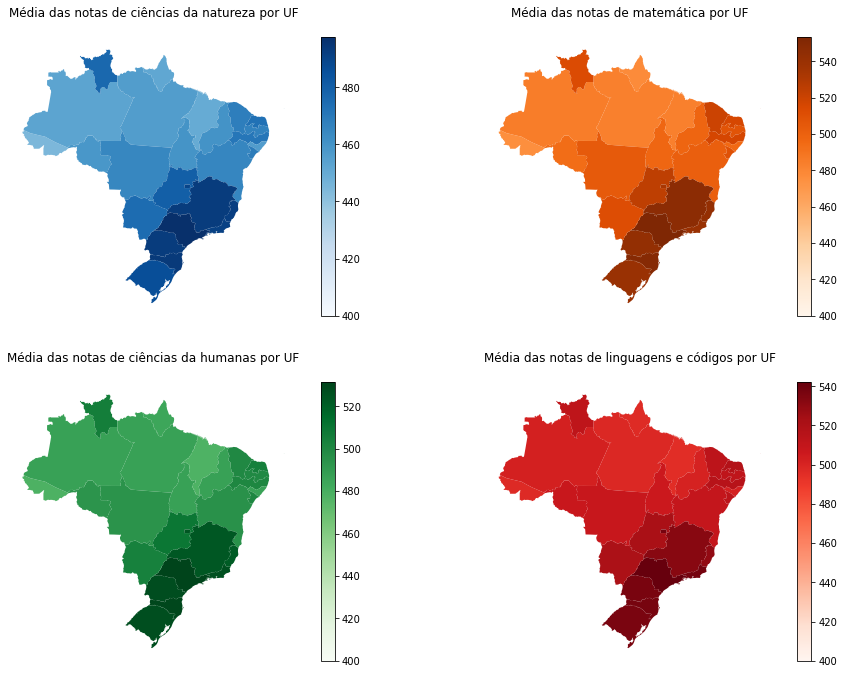

In [ ]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,10))
media_natureza_por_estado.plot(ax=ax1, column='NU_NOTA_CN', cmap='Blues', legend=True, vmin=400)
media_matematica_por_estado.plot(ax=ax2, column='NU_NOTA_MT', cmap='Oranges', legend=True, vmin=400)
media_humanas_por_estado.plot(ax=ax3, column='NU_NOTA_CH', cmap='Greens', legend=True, vmin=400)
media_linguagens_por_estado.plot(ax=ax4, column='NU_NOTA_LC', cmap='Reds', legend=True, vmin=400)

ax1.set_title('Média das notas de ciências da natureza por UF', pad=20, fontsize=12, color='black')
ax1.set_yticks([])
ax1.set_xticks([])
ax2.set_title('Média das notas de matemática por UF', pad=20, fontsize=12, color='black')
ax2.set_yticks([])
ax2.set_xticks([])
ax3.set_title('Média das notas de ciências da humanas por UF', pad=20, fontsize=12, color='black')
ax3.set_yticks([])
ax3.set_xticks([])
ax4.set_title('Média das notas de linguagens e códigos por UF', pad=20, fontsize=12, color='black')
ax4.set_yticks([])
ax4.set_xticks([])

sns.despine(bottom=True, left=True)
fig.tight_layout(pad=3.0)
plt.show()


#8. CANDIDATOS COM CONDIÇÃO ESPECIAL

Para a nossa legislação, a [Lei Brasileira de Inclusão da Pessoa com Deficiência](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm#:~:text=Art.%202%C2%BA%20Considera%2Dse%20pessoa,condi%C3%A7%C3%B5es%20com%20as%20demais%20pessoas.) considera pessoa com deficiência "aquela que tem impedimento de longo prazo de natureza física, mental, intelectual ou sensorial, o qual, em interação com uma ou mais barreiras, pode obstruir sua participação plena e efetiva na sociedade em igualdade de condições com as demais pessoas"

A hipótese a ser discutida aqui é se o candidato com deficiência tem condições de participar da competição em pé de igualdade, tanto com candidatos sem necessidades especiais, como com outros candidatos deficientes. Isto porque apenas em 2016 foi aprovada a alteração na [Lei de cotas](http://www.planalto.gov.br/ccivil_03/_Ato2011-2014/2012/Lei/L12711.htm) que inclui cota para deficientes nas universidades públicas, o que mesmo assim, não inclui os programas como Fies e ProUni para universidades particulares.


In [ ]:
# Exemplo média de candidatos com surdez
enem_presentes[enem_presentes['IN_SURDEZ']==1]['NU_NOTA_SOMA'].mean()

2084.761904761904

In [ ]:
# Exemplo média de candidatos com dislexia
enem_presentes[enem_presentes['IN_DISLEXIA']==1]['NU_NOTA_SOMA'].mean()

2727.176315789474

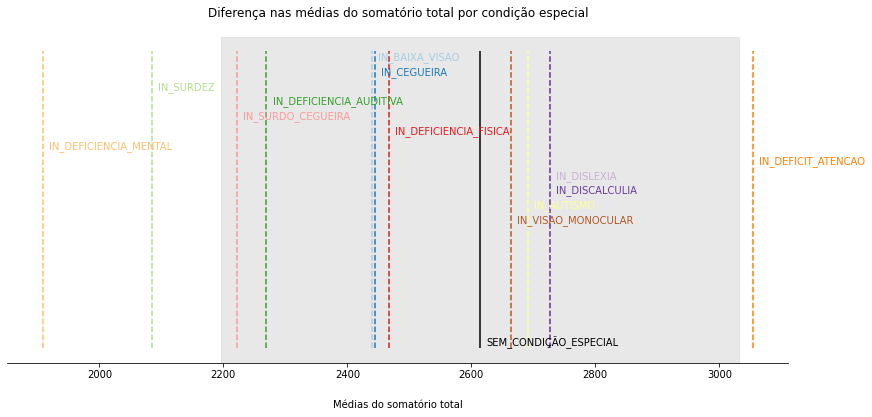

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

pessoas_sem_deficiencia = enem_presentes
for i, at in enumerate(atendimentos_especiais):
  media = enem_presentes[enem_presentes[at]==1]['NU_NOTA_SOMA'].mean()
  ax.vlines(x=media, ymin=0, ymax=100, color=sns.color_palette('Paired')[i], linestyle='--')
  ax.text(media+10,100-5*i,at, color=sns.color_palette('Paired')[i], va='top', ha='left')
  pessoas_sem_deficiencia = pessoas_sem_deficiencia[~pessoas_sem_deficiencia[at].isin([1])]

ax.vlines(x=pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean(), ymin=0, ymax=100, color='black')
ax.text(pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()+10,0,'SEM_CONDIÇÃO_ESPECIAL', color='black', va='bottom', ha='left')
ax.axvspan(pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()-pessoas_sem_deficiencia['NU_NOTA_SOMA'].std(),
           pessoas_sem_deficiencia['NU_NOTA_SOMA'].mean()+pessoas_sem_deficiencia['NU_NOTA_SOMA'].std(),
           alpha=0.5, color='lightgray')

plt.title('Diferença nas médias do somatório total por condição especial', pad=20, fontsize=12, color='black')
plt.xlabel('Médias do somatório total', labelpad=20)
plt.yticks([])
sns.despine(left=True)
plt.show()

A zona cinza corresponde a um desvio padrão da média de candidatos sem condição especial (isto representa cerca de 70% dos inscritos). Com isso, podemos entender se o atendimento especializado oferecido pelo MEC é inclusivo e coloca os candidatos com alguma necessidade especial em igualdade com os demais.

Ao que parece, a que a maioria encontra-se dentro da zona cinza, o que é um bom resultado. A atenção vai exatamente para os candidatos com deficiência mental e surdos, que ficaram abaixo, e para os candidatos com defict de atenção, que apresentaram resultado melhor. Aqui apenas validamos o bom resultado do atendimento especializado para a prestação do exame e pode-se levantar a seguinte questão:
* Como podemos melhorar o exame para aqueles com deficiência mental e surdez, para que, apesar de suas desigualdades, possam participar de fato da competição?

#9. A TEORIA DA RESPOSTA AO ÍTEM

Segundo o [Ministério da Educação](http://inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/teoria-de-resposta-ao-item-avalia-habilidade-e-minimiza-o-chute-/21206#:~:text=A%20teoria%20da%20resposta%20ao,total%20de%20acertos%20no%20teste.&text=O%20desempenho%20em%20um%20teste,caracter%C3%ADsticas%20das%20quest%C3%B5es%20(itens)), a nota das áreas do ENEM segue a A teoria da resposta ao item (TRI), uma metodologia de avaliação que não contabiliza apenas o número total de acertos no teste. De acordo com o método, o item é a unidade básica de análise, mas o desempenho em um teste pode ser explicado pela habilidade do avaliado e pelas características das questões.

A TIR qualifica o item de acordo com três parâmetros:

* Poder de discriminação
* Grau de dificuldade
* Possibilidade de acerto ao acaso (chute)

e permite estimar a habilidade de um candidato avaliado e de garantir que essas habilidades, medidas a partir de um conjunto de itens, sejam comparadas com outro conjunto na mesma escala, ainda que eles não sejam os mesmos e que haja quantidades diferentes de itens usados para o cálculo. Dessa forma acertar 40 itens em uma área não significa, necessariamente, ter uma proficiência maior do que em outra área, cujo número de acertos tenha sido 35. Além disso, acertar 40 itens em uma área não significa, necessariamente, ter uma proficiência igual a outro candidato, que também tenha acertado 40.

Logo, é interessante entender como essa metodologia afeta a nota do aluno, por exemplo, o quanto uma questão correta altera a nota final em cada uma das 4 diferentes áreas do conhecimento. A hipótese gira em torno da ideia de que talvez possamos estabeler um piso (mínimo) para o número de questões em que o aluno se diferencia da maioria.

In [ ]:
# Criando 4 colunas com a quantidade de questões corretas em cada prova
enem_presentes['ACERTOS_CN'] = 0
enem_presentes['ACERTOS_CH'] = 0
enem_presentes['ACERTOS_LC'] = 0
enem_presentes['ACERTOS_MT'] = 0
for i in tqdm(enem_presentes.index):
  enem_presentes['ACERTOS_CN'][i] = sum(1 if x == y else 0 for x, y in zip(enem_presentes['TX_GABARITO_CN'][i], enem_presentes['TX_RESPOSTAS_CN'][i]))
  enem_presentes['ACERTOS_CH'][i] = sum(1 if x == y else 0 for x, y in zip(enem_presentes['TX_GABARITO_CH'][i], enem_presentes['TX_RESPOSTAS_CH'][i]))
  enem_presentes['ACERTOS_LC'][i] = sum(1 if x == y else 0 for x, y in zip(enem_presentes['TX_GABARITO_LC'][i], enem_presentes['TX_RESPOSTAS_LC'][i]))
  enem_presentes['ACERTOS_MT'][i] = sum(1 if x == y else 0 for x, y in zip(enem_presentes['TX_GABARITO_MT'][i], enem_presentes['TX_RESPOSTAS_MT'][i]))

100%|██████████| 92539/92539 [00:46<00:00, 1991.44it/s]


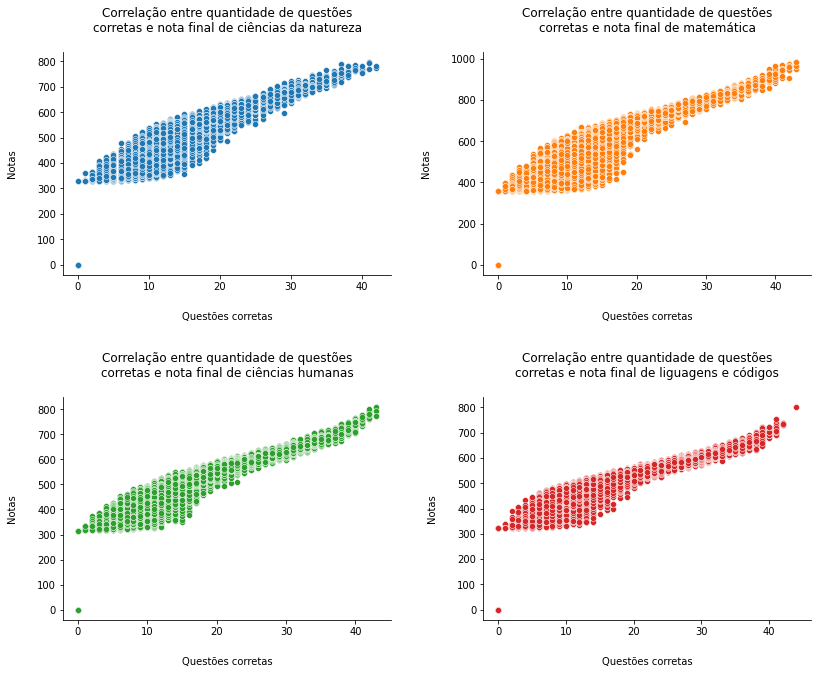

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10))

sns.scatterplot('ACERTOS_CN', 'NU_NOTA_CN', data=enem_presentes, ax=ax1, color=sns.color_palette('tab10')[0])
sns.scatterplot('ACERTOS_MT', 'NU_NOTA_MT', data=enem_presentes, ax=ax2, color=sns.color_palette('tab10')[1])
sns.scatterplot('ACERTOS_CH', 'NU_NOTA_CH', data=enem_presentes, ax=ax3, color=sns.color_palette('tab10')[2])
sns.scatterplot('ACERTOS_LC', 'NU_NOTA_LC', data=enem_presentes, ax=ax4, color=sns.color_palette('tab10')[3])

ax1.set_title('Correlação entre quantidade de questões\ncorretas e nota final de ciências da natureza', pad=20, fontsize=12, color='black')
ax1.set_xlabel('Questões corretas', labelpad=20)
ax1.set_ylabel('Notas', labelpad=20)
ax2.set_title('Correlação entre quantidade de questões\ncorretas e nota final de matemática', pad=20, fontsize=12, color='black')
ax2.set_xlabel('Questões corretas', labelpad=20)
ax2.set_ylabel('Notas', labelpad=20)
ax3.set_title('Correlação entre quantidade de questões\ncorretas e nota final de ciências humanas', pad=20, fontsize=12, color='black')
ax3.set_xlabel('Questões corretas', labelpad=20)
ax3.set_ylabel('Notas', labelpad=20)
ax4.set_title('Correlação entre quantidade de questões\ncorretas e nota final de liguagens e códigos', pad=20, fontsize=12, color='black')
ax4.set_xlabel('Questões corretas', labelpad=20)
ax4.set_ylabel('Notas', labelpad=20)

sns.despine()
fig.tight_layout(pad=3.0)
plt.show()

Com esta visualização podemos notar que apenas a partir de 20 acertos, começa a ter uma correlação linear positiva entre a quantidade de acertos e a nota final, ou seja, uma questão correta a mais aumenta o seu resultado. Entre 10 e 20 questões corretas (provavelmente onde a maioria dos candidatos se encontra) as notas variam sem padrão algum com candidatos possivelmente tirando notas superiores apesar do número de questões marcadas corretamente.

#10. POR DENTRO DA PANDEMIA E PERSPECTIVAS PARA O EXAME ONLINE

Para o historiador Leandro Karnal, em entrevista ao [Estado](https://saude.estadao.com.br/noticias/geral,classes-media-e-alta-enfrentam-o-tedio-ja-as-classes-baixas-enfrentam-fome-diz-leandro-karnal,70003302191), "a epidemia revela de forma quase violenta a desigualdade. Classes média e alta enfrentam o tédio, classes baixas enfrentam a fome". É nesse sentido que levantou-se a discussão no começo deste ano sobre a aplicação do próximo exame. Algumas indagações diziam respeito a: 

* Quem é o aluno que irá conseguir estudar?
* Caso o exame seja online, quem será capaz de prestar?
* Estaremos aumentando ou preservando o abismo social evidente entre estudantes de diferentes classes e cores?

In [ ]:
enem.groupby('Q024')['Q025'].value_counts()

Q024  Q025
Não   Sim     33766
      Não     24958
Sim   Sim     65027
      Não      3629
Name: Q025, dtype: int64

In [ ]:
# Quantidade de inscritos por posse de computador e internet
tmp = enem.groupby('Q024')['Q025'].value_counts()
relacao_internet_computador = [f'{round(tmp[i]*100/tmp.sum(),2)}%' for i in tmp.index]
relacao_internet_computador

['26.51%', '19.59%', '51.05%', '2.85%']

No contexto da pandemia é fácil entender qual aluno está sendo capaz de se preparar para o próximo exame, seja ele presencial ou online. Segundo o jornal [Folha de São Paulo](https://www1.folha.uol.com.br/educacao/2020/03/fechamento-generalizado-de-escolas-impoe-desafio-inedito-a-educacao.shtml), enquanto escolas particulares rapidamente se adaptaram ao novo modelo de ensino a distância transmitindo aulas ao vivo por computador ou plataformas online, escolas da rede pública de ensino ainda não sabem como será o uso de tecnologia durante o ano letivo.

O problema está no acesso a recursos para estudar online: 46% dos candidatos não tem computador em casa - o número é ainda mais assustador entre pessoas autodeclaradas pretas, pardas e indígenas, ultrapassando os 50%. Ademais, 3% dos candidatos apesar de possuir computador, dizem não ter acesso a internet, de forma que estaria sendo negada à 49% dos inscritos a oportunidade de estudar adequadamente e competir de forma justa.

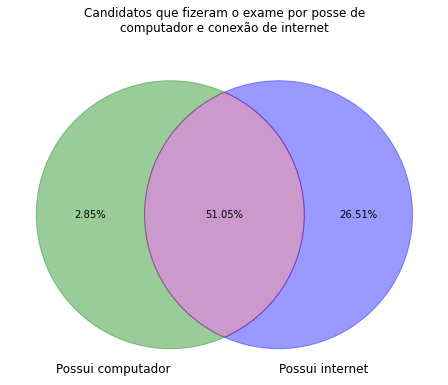

In [ ]:
# Diagrama de Venn para visualizar a relacao acima 
fig, ax = plt.subplots(figsize=(10,6))

v = venn2(subsets = (2,2,2), set_labels = ('Possui computador', 'Possui internet'), ax=ax)
v.get_patch_by_id('10').set_color('green')
v.get_patch_by_id('01').set_color('blue')
v.get_patch_by_id('11').set_color('purple')
v.get_label_by_id('10').set_text(relacao_internet_computador[3])
v.get_label_by_id('01').set_text(relacao_internet_computador[0])
v.get_label_by_id('11').set_text(relacao_internet_computador[2])

plt.title('Candidatos que fizeram o exame por posse de\ncomputador e conexão de internet', 
          pad=20, fontsize=12, color='black')
plt.show()

In [ ]:
computador_internet_raca = enem.groupby('TP_COR_RACA')['TEM_COMPUTADOR_E_INTERNET'].value_counts(normalize=True).unstack()
computador_internet_raca.rename(index={0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena'}, inplace=True)
computador_internet_raca

TEM_COMPUTADOR_E_INTERNET,Não,Sim
TP_COR_RACA,,
Não declarado,0.475244,0.524756
Branca,0.334203,0.665797
Preta,0.591595,0.408405
Parda,0.576101,0.423899
Amarela,0.533445,0.466555
Indígena,0.748737,0.251263


#11. REFERÊNCIAS BIBLIOGRÁFICAS

Alura. **Imersão Dados Alura Aula 1: Sua primeira análise em dados da Educação**.
Disponível em [link](https://www.alura.com.br/imersao-dados/aula01-educacao-no-brasil)

Alura. **Imersão Dados Alura Aula 2: Análise exploratória de dados**. Disponível em [link](https://www.alura.com.br/imersao-dados/aula02-analises-exploratoria)

Alura. **Imersão Dados Aula 3: Distribuições e correlações entre notas**. Dispoível em [link](https://www.alura.com.br/imersao-dados/aula03-distribuicoes-ciencia-de-dados) 

Angela Pinho. **Fechamento generalizado de escolas impõe desafio inédito à educação**. [link](https://www1.folha.uol.com.br/educacao/2020/03/fechamento-generalizado-de-escolas-impoe-desafio-inedito-a-educacao.shtml)

Eduardo Peret. **Mulher estuda mais, trabalha mais e ganha menos do que o homem**. Disponível em [link](https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/20234-mulher-estuda-mais-trabalha-mais-e-ganha-menos-do-que-o-homem#:~:text=Mulher%20estuda%20mais%2C%20trabalha%20mais%20e%20ganha%20menos%20do%20que%20o%20homem,-Editoria%3A%20Estat%C3%ADsticas%20Sociais&text=Mesmo%20assim%2C%20e%20ainda%20contando,G%C3%AAnero%2C%20divulgado%20hoje%20pelo%20IBGE)

Géssica Santos. **Como pegar o certificado do ensino médio pelo Enem?**. Disponível em [link](https://www.educamaisbrasil.com.br/educacao/enem/como-pegar-o-certificado-do-ensino-medio-pelo-enem)

IBGE. **Distribuição percentual da População por Sexo - Brasil - 1980 a 2010**. Disponível em [link](https://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-sexo.html)

IBGE. **PORTARIA Nº PR-254, DE 25 DE AGOSTO DE 2020**. Disponível em [link](https://www.in.gov.br/web/dou/-/portaria-n-pr-254-de-25-de-agosto-de-2020-274382852)

INEP. **Teoria de resposta ao item avalia habilidade e minimiza o “chute”**. 
Disponível em [link](http://inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/teoria-de-resposta-ao-item-avalia-habilidade-e-minimiza-o-chute-/21206#:~:text=A%20teoria%20da%20resposta%20ao,total%20de%20acertos%20no%20teste.&text=O%20desempenho%20em%20um%20teste,caracter%C3%ADsticas%20das%20quest%C3%B5es%20(itens))

Presidência da República. **LEI Nº 12.711, DE 29 DE AGOSTO DE 2012**. Disponível em [link](http://www.planalto.gov.br/ccivil_03/_Ato2011-2014/2012/Lei/L12711.htm)

Presidência da República. **LEI Nº 13.146, DE 6 DE JULHO DE 2015**. Disponível em [link](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2015/lei/l13146.htm#:~:text=Art.%202%C2%BA%20Considera%2Dse%20pessoa,condi%C3%A7%C3%B5es%20com%20as%20demais%20pessoas.)

Priscilla Mengue. **Leandro Karnal: 'Classes media e alta enfrentam tédio, classes baixas enfrentam fome'**. [link](https://saude.estadao.com.br/noticias/geral,classes-media-e-alta-enfrentam-o-tedio-ja-as-classes-baixas-enfrentam-fome-diz-leandro-karnal,70003302191)

Selva Prabhakaran. **Top 50 matplotlib Visualizations – The Master Plots**. Disponível em [link](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)